In [4]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [2]:
# importing tweet data
tweet_data = pd.read_csv("scraped_tweets.csv")
tweet_data = tweet_data.drop(columns=['index'])

In [9]:
tweet_data.head()

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,Discovertech3,Just a bot helping developers and designers by...,Internet,1,1546,301587,1,@francoislegault with the Covid cases increasi...,[]
1,BettyB2007,"Loving every bit of life every day. Otherwise,...","New York, USA",218,39,10668,239,#COVID19 hospitalization rates in several COVI...,['COVID19']
2,InesMckee14,Stay safe and do not listen to eejits. 😷,"Islas Canarias, España",308,73,8234,3694,I cry for the people of Brazil 🇧🇷\n\n#P1 is se...,"['P1', 'COVID19']"
3,LuCeleste15,Head of #Governance @BissauUNDP. #localizingSD...,Guinea Bissau,762,419,2947,0,While we continue to assess the impact of #COV...,"['COVID19', 'buildforwardbetter', 'governance'..."
4,HPMohapatra,"Librarian, ICRR, Phulbani,\nDistrict I & PR Of...",Phulbani-762001,43,66,6053,1,#LastOver\n\n🏏It is time to play well. We have...,"['LastOver', 'vaccine']"


In [21]:
# Get overall sentiments of entire tweet dataset
# ------------------------------------------------

# derive tweet sentiment from sentiment scores
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "neg"
    elif row.compound > cutoff:
        return "pos"
    else:
        return "neu"

# set of stop words in the english language
stop_words = set(stopwords.words('english'))


# remove stop words from each tweet
filtered_tweet_list = []
for tweet in tweet_data['text']:
    word_tokens = word_tokenize(tweet)
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = ' '.join(filtered_tweet)
    filtered_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)"," ",filtered_tweet).split())
    filtered_tweet_list.append(filtered_tweet)

# find sentiment of each tweet
df = pd.DataFrame({"text": filtered_tweet_list})
sid = SentimentIntensityAnalyzer()
scores = []
for sentence in df.text:
    data = sid.polarity_scores(sentence)
    data['text'] = sentence
    scores += [data]
    
scores_df = pd.DataFrame(scores)
scores_df["label"] = scores_df.apply(label_sentiment, axis=1)
scores_df["followers"] = tweet_data["followers"]
scores_df["following"] = tweet_data["following"]
scores_df["username"] = tweet_data["username"]
print(scores_df['label'].value_counts())

neu    5712
pos    2542
neg    1746
Name: label, dtype: int64


In [22]:
scores_df

,neg,neu,pos,compound,text,label,followers,following,username
0,0.000,1.000,0.000,0.0000,francoislegault Covid cases increasing younger...,neu,1546,1,Discovertech3
1,0.100,0.864,0.036,-0.3182,COVID19 hospitalization rates several COVID NE...,neu,39,218,BettyB2007
2,0.207,0.657,0.136,-0.1280,I cry people Brazil P1 serious The world bette...,neu,73,308,InesMckee14
3,0.000,0.897,0.103,0.3400,While continue assess impact COVID19 rethink b...,neu,419,762,LuCeleste15
4,0.074,0.453,0.474,0.9206,LastOver It time play well We NEARLY WON vacci...,pos,66,43,HPMohapatra
...,...,...,...,...,...,...,...,...,...
9995,0.000,1.000,0.000,0.0000,Home less 3 world population Brazil accounted ...,neu,1546,4986,naanders
9996,0.000,0.725,0.275,0.6908,People fully vaccinated COVID19 travel freely ...,pos,129,144,SaramikiAndaluz
9997,0.104,0.625,0.271,0.8020,GYamey UlrikaCampbell TIME Prior Covid19 Swede...,pos,558,2039,unique_anonym
9998,0.000,0.910,0.090,0.3774,BREAKING coronaupdates India Gurgaon reports 6...,neu,151,1136,aayushgoel83


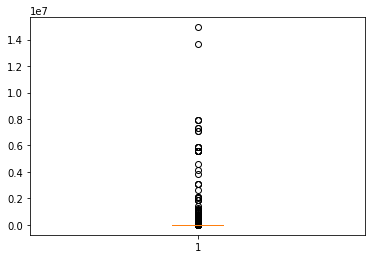

In [35]:
plt.boxplot(scores_df["followers"])
plt.show()

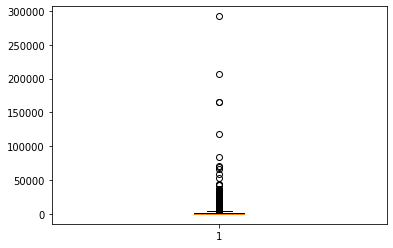

In [36]:
plt.boxplot(scores_df["following"])
plt.show()

In [48]:
follower_quartiles = scores_df.followers.quantile([0.33,0.66])
following_quartiles = scores_df.following.quantile([0.33,0.66])

In [55]:
len_tweets = len(scores_df)
parts = int(len_tweets/3)
followers_sorted = scores_df.sort_values(by=['followers'])

low_follower = scores_df.loc[(scores_df["followers"] >= 0) & 
                             (scores_df["followers"] < follower_quartiles[0.33])]

medium_follower = scores_df.loc[(scores_df["followers"] >= follower_quartiles[0.33]) & 
                             (scores_df["followers"] < follower_quartiles[0.66])]

high_follower = scores_df.loc[(scores_df["followers"] >= follower_quartiles[0.66])]


low_following = scores_df.loc[(scores_df["following"] >= 0) & 
                             (scores_df["following"] < following_quartiles[0.33])]

medium_following = scores_df.loc[(scores_df["following"] >= following_quartiles[0.33]) & 
                             (scores_df["following"] < following_quartiles[0.66])]

high_following = scores_df.loc[(scores_df["following"] >= following_quartiles[0.66])]

### low follower analysis

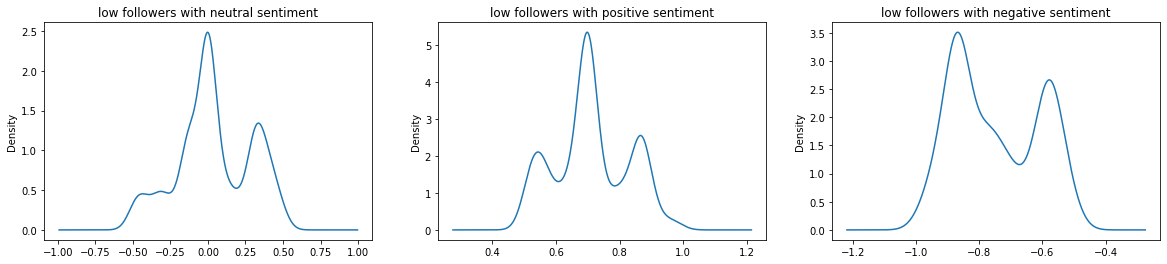

In [67]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
low_follower[low_follower.label=="neu"].compound.plot.kde();
plt.title("low followers with neutral sentiment")

plt.subplot(1, 3, 2)
low_follower[low_follower.label=="pos"].compound.plot.kde();
plt.title("low followers with positive sentiment")

plt.subplot(1, 3, 3)
low_follower[low_follower.label=="neg"].compound.plot.kde();
plt.title("low followers with negative sentiment")

plt.show()

In [68]:
print("tweets with low followers:")
print(low_follower['label'].value_counts())

tweets with low followers:
neu    1815
pos     927
neg     554
Name: label, dtype: int64


### medium follower analysis

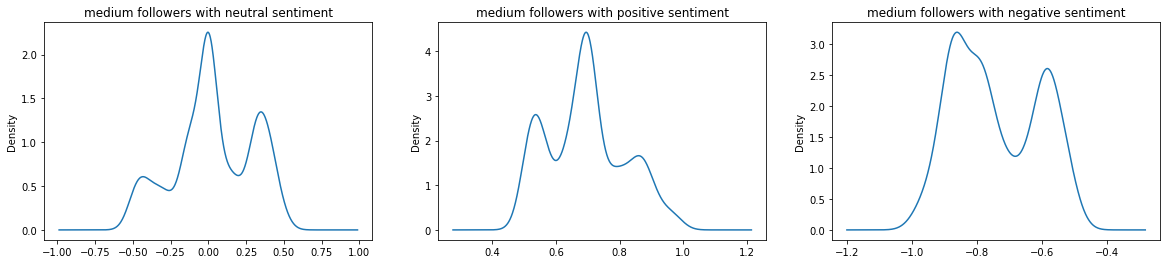

In [69]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
medium_follower[medium_follower.label=="neu"].compound.plot.kde();
plt.title("medium followers with neutral sentiment")

plt.subplot(1, 3, 2)
medium_follower[medium_follower.label=="pos"].compound.plot.kde();
plt.title("medium followers with positive sentiment")

plt.subplot(1, 3, 3)
medium_follower[medium_follower.label=="neg"].compound.plot.kde();
plt.title("medium followers with negative sentiment")

plt.show()

In [71]:
print("tweets with medium followers:")
print(medium_follower['label'].value_counts())

tweets with medium followers:
neu    1874
pos     816
neg     613
Name: label, dtype: int64


### high follower analaysis

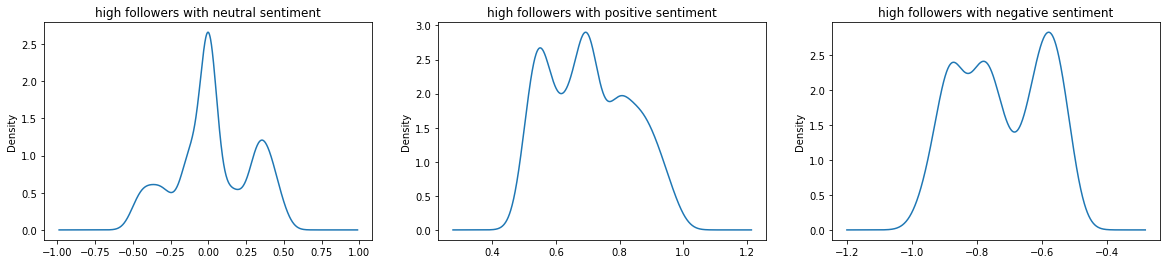

In [72]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
high_follower[high_follower.label=="neu"].compound.plot.kde();
plt.title("high followers with neutral sentiment")

plt.subplot(1, 3, 2)
high_follower[high_follower.label=="pos"].compound.plot.kde();
plt.title("high followers with positive sentiment")

plt.subplot(1, 3, 3)
high_follower[high_follower.label=="neg"].compound.plot.kde();
plt.title("high followers with negative sentiment")

plt.show()

In [74]:
print("tweets with high followers:")
print(high_follower['label'].value_counts())

tweets with high followers:
neu    2023
pos     799
neg     579
Name: label, dtype: int64


### low following analysis

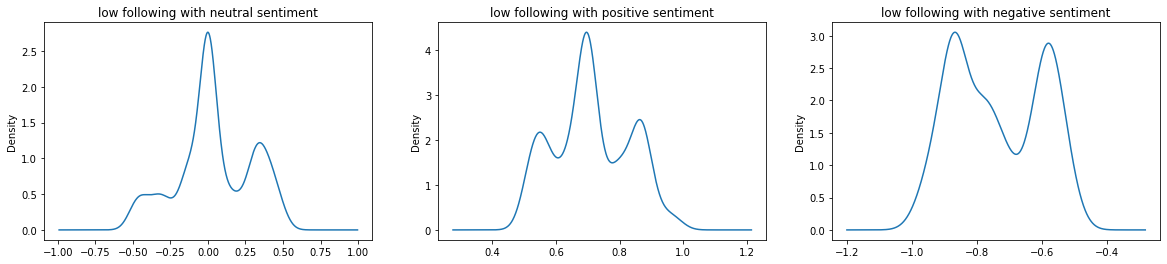

In [75]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
low_following[low_following.label=="neu"].compound.plot.kde();
plt.title("low following with neutral sentiment")

plt.subplot(1, 3, 2)
low_following[low_following.label=="pos"].compound.plot.kde();
plt.title("low following with positive sentiment")

plt.subplot(1, 3, 3)
low_following[low_following.label=="neg"].compound.plot.kde();
plt.title("low following with negative sentiment")

plt.show()

In [76]:
print("tweets with low following:")
print(low_following['label'].value_counts())

tweets with low following:
neu    1885
pos     874
neg     536
Name: label, dtype: int64


### medium following analysis

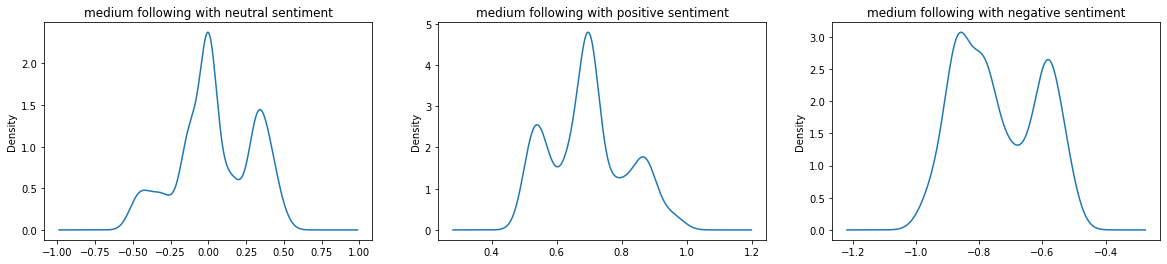

In [77]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
medium_following[medium_following.label=="neu"].compound.plot.kde();
plt.title("medium following with neutral sentiment")

plt.subplot(1, 3, 2)
medium_following[medium_following.label=="pos"].compound.plot.kde();
plt.title("medium following with positive sentiment")

plt.subplot(1, 3, 3)
medium_following[medium_following.label=="neg"].compound.plot.kde();
plt.title("medium following with negative sentiment")

plt.show()

In [78]:
print("tweets with medium following:")
print(medium_following['label'].value_counts())

tweets with medium following:
neu    1828
pos     869
neg     608
Name: label, dtype: int64


### high following analysis

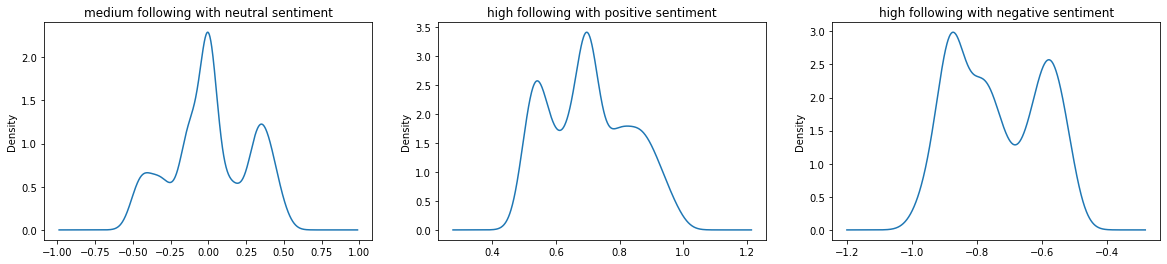

In [79]:
plt.figure(figsize=(20, 4)) 
plt.subplot(1, 3, 1)
high_following[high_following.label=="neu"].compound.plot.kde();
plt.title("medium following with neutral sentiment")

plt.subplot(1, 3, 2)
high_following[high_following.label=="pos"].compound.plot.kde();
plt.title("high following with positive sentiment")

plt.subplot(1, 3, 3)
high_following[high_following.label=="neg"].compound.plot.kde();
plt.title("high following with negative sentiment")

plt.show()

In [80]:
print("tweets with high following:")
print(high_following['label'].value_counts())

tweets with high following:
neu    1999
pos     799
neg     602
Name: label, dtype: int64
